# **Đọc dữ liệu**

In [2]:
import numpy as np
import pandas as pd

In [3]:
data_encoded = pd.read_csv("/content/drive/MyDrive/Các kì học tại HUS/D. Học kỳ 8 tại HUS /Mô hình hóa/BigMart-20240421T125147Z-001/BigMart/data_encoded.csv", header=0)
data_encoded

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0.0,0.017235,4.0,249.8092,9.0,14,1.0,0.0,1.0,3735.1380
1,8.0,5.920,1.0,0.020653,14.0,48.2692,3.0,4,1.0,2.0,2.0,443.4228
2,662.0,17.500,0.0,0.017457,10.0,141.6180,9.0,14,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,1.0,0.017834,6.0,182.0950,0.0,15,2.0,2.0,0.0,732.3800
4,1297.0,8.930,0.0,0.009780,9.0,53.8614,1.0,26,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.064969,13.0,214.5218,1.0,26,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,1.0,0.046931,0.0,108.1570,7.0,11,2.0,1.0,1.0,549.2850
8520,1357.0,10.600,0.0,0.035226,8.0,85.1224,6.0,9,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,1.0,0.139418,13.0,103.1332,3.0,4,1.0,2.0,2.0,1845.5976


# **Feature importances**

In [7]:
X = data_encoded.drop(['Item_Outlet_Sales', 'Item_Identifier'],axis=1)
y = data_encoded['Item_Outlet_Sales']

In [8]:
from xgboost import XGBRFRegressor
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_

}).sort_values(by='XGBRF_importance',ascending=False)

feature_importance_df

,feature,XGBRF_importance
9,Outlet_Type,0.606979
6,Outlet_Establishment_Year,0.131090
4,Item_MRP,0.122873
5,Outlet_Identifier,0.091466
7,Outlet_Size,0.025595
8,Outlet_Location_Type,0.014804
0,Item_Weight,0.002770
2,Item_Visibility,0.002271
3,Item_Type,0.001474
1,Item_Fat_Content,0.000677


In [9]:
top_5_features = feature_importance_df.sort_values(by='XGBRF_importance', ascending=False).head(5)
top_5_features

,feature,XGBRF_importance
9,Outlet_Type,0.606979
6,Outlet_Establishment_Year,0.131090
4,Item_MRP,0.122873
5,Outlet_Identifier,0.091466
7,Outlet_Size,0.025595


In [10]:
top_5_feature_names = top_5_features['feature'].tolist()

X_selected = X[top_5_feature_names]
X_selected


,Outlet_Type,Outlet_Establishment_Year,Item_MRP,Outlet_Identifier,Outlet_Size
0,1.0,14,249.8092,9.0,1.0
1,2.0,4,48.2692,3.0,1.0
2,1.0,14,141.6180,9.0,1.0
3,0.0,15,182.0950,0.0,2.0
4,1.0,26,53.8614,1.0,0.0
...,...,...,...,...,...
8518,1.0,26,214.5218,1.0,0.0
8519,1.0,11,108.1570,7.0,2.0
8520,1.0,9,85.1224,6.0,2.0
8521,2.0,4,103.1332,3.0,1.0


In [11]:
bigmart_final = X_selected.assign(Item_Outlet_Sales=y)
bigmart_final

,Outlet_Type,Outlet_Establishment_Year,Item_MRP,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales
0,1.0,14,249.8092,9.0,1.0,3735.1380
1,2.0,4,48.2692,3.0,1.0,443.4228
2,1.0,14,141.6180,9.0,1.0,2097.2700
3,0.0,15,182.0950,0.0,2.0,732.3800
4,1.0,26,53.8614,1.0,0.0,994.7052
...,...,...,...,...,...,...
8518,1.0,26,214.5218,1.0,0.0,2778.3834
8519,1.0,11,108.1570,7.0,2.0,549.2850
8520,1.0,9,85.1224,6.0,2.0,1193.1136
8521,2.0,4,103.1332,3.0,1.0,1845.5976


# **Split data**

In [12]:
from sklearn.utils import shuffle
bigmart_final = shuffle(bigmart_final)
bigmart_final

,Outlet_Type,Outlet_Establishment_Year,Item_MRP,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales
4460,1.0,26,100.7332,1.0,0.0,1230.3984
472,3.0,28,184.7266,5.0,1.0,8114.7704
817,3.0,28,83.1276,5.0,1.0,1868.2348
4858,1.0,14,92.5436,9.0,1.0,1607.2412
3606,1.0,26,235.1958,1.0,0.0,4673.9160
...,...,...,...,...,...,...
1228,2.0,4,154.4630,3.0,1.0,2503.4080
7038,3.0,28,115.2176,5.0,1.0,1030.6584
5330,0.0,15,101.4700,0.0,2.0,399.4800
4247,1.0,14,232.7616,9.0,1.0,1874.8928


In [13]:
from sklearn.model_selection import train_test_split
X = bigmart_final.drop(columns=['Item_Outlet_Sales'])
y = bigmart_final['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(6818, 5)

# **Random Forest**

In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split

In [ ]:
# rf_model = RandomForestRegressor()

# param_grid = {
#     'n_estimators': np.arange(100,1100,100),
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_leaf': np.arange(1,10,1)
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# print("Best MSE Score: ", -grid_search.best_score_)

In [48]:
rf = RandomForestRegressor(n_estimators = 1200, max_depth = None,
                           min_samples_leaf = 50, criterion = 'squared_error',
                           min_samples_split = 2, max_features = 'log2',
                           max_leaf_nodes = None,
                           random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test MAE: ", mae)
print("Test R²: ", r2)

Test MSE:  1200047.5800623433
Test MAE:  774.0468238992088
Test R²:  0.5820197738420672


In [ ]:
# gb_model = GradientBoostingRegressor()

# param_grid = {
#     'n_estimators': np.arange(100,1100,100),
#     'max_depth': [None, 2, 4, 6, 8, 10],
#     'learning_rate': [0.05, 0.1, 0.2]
# }

# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# print("Best MSE Score: ", -grid_search.best_score_)

In [94]:
gb = GradientBoostingRegressor(n_estimators= 1200, learning_rate=0.1,
                               max_depth = 2, loss = 'absolute_error',
                               min_samples_split = 2, max_features = "sqrt",
                               min_samples_leaf = 2, criterion = 'friedman_mse',
                               random_state = None)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test MAE: ", mae)
print("Test R²: ", r2)

Test MSE:  1217192.7535825954
Test MAE:  773.2449391408954
Test R²:  0.5760480576996624


In [95]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

    # Plot dữ liệu thực tế và dự đoán
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Thực tế')
    plt.plot(y_test, y_test, color='red', linewidth=2, linestyle='--', label='Dự đoán')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model_name} - Thực tế vs Dự đoán")
    plt.grid(True)
    plt.show()

Random Forest Metrics:
Mean Squared Error: 1200047.5800623433
Mean Absolute Error: 774.0468238992088
R-squared: 0.5820197738420672


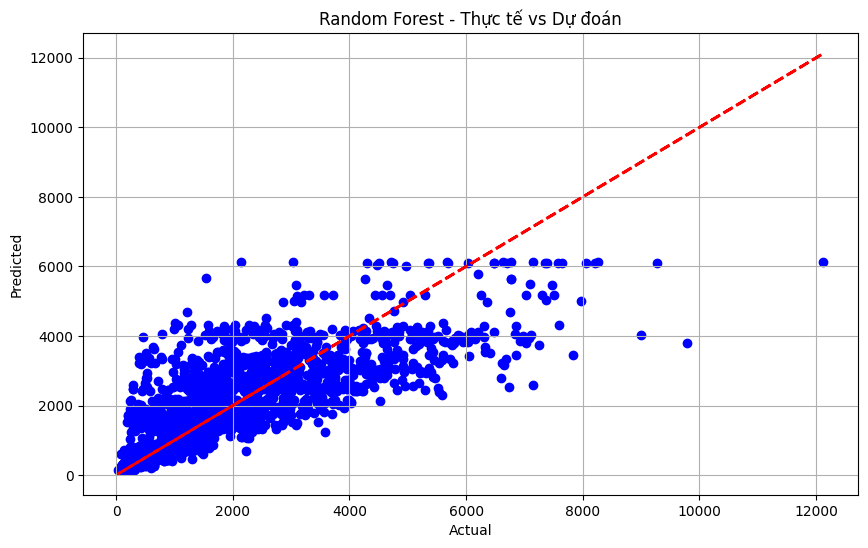

In [96]:
evaluate_model(rf, X_test, y_test, "Random Forest")

Gradient Boosting Metrics:
Mean Squared Error: 1217192.7535825954
Mean Absolute Error: 773.2449391408954
R-squared: 0.5760480576996624


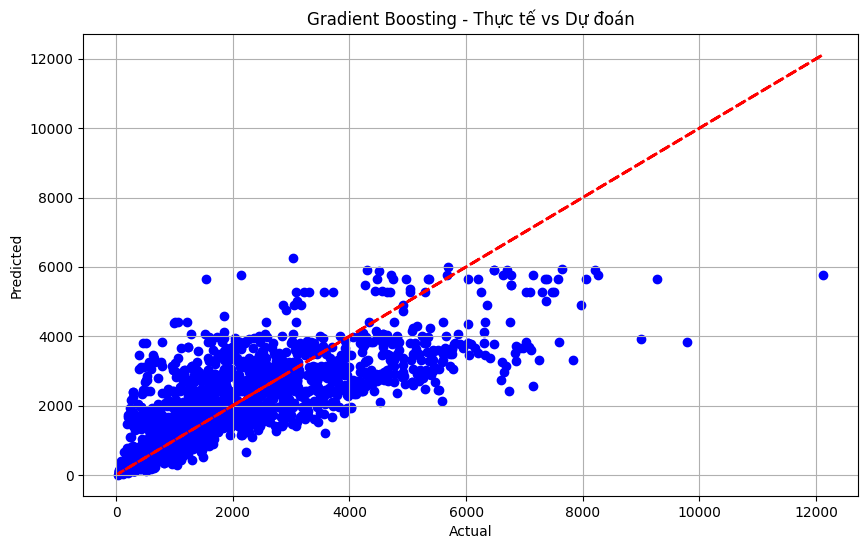

In [97]:
evaluate_model(gb, X_test, y_test, "Gradient Boosting")